In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.sparse as sp
import scipy.sparse.linalg as spla


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

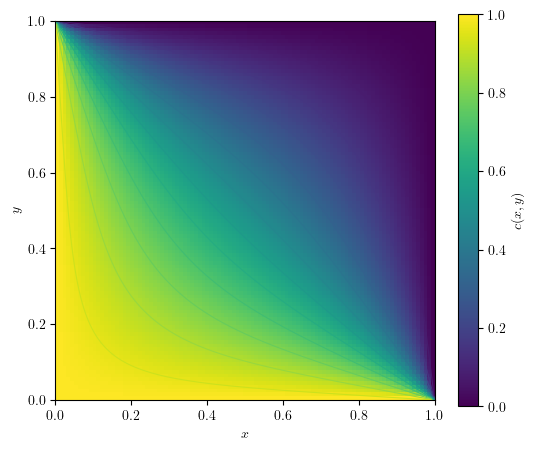

In [8]:
n = 101
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)

c = np.zeros((n, n))
c[0, :]  = 1.0
c[-1, :] = 0.0 
c[:, 0]  = 1.0
c[:, -1] = 0.0
c[-1, 0] = 0.5
c[0, -1] = 0.5

m = n - 2
T = sp.diags([-1, 2, -1], [-1, 0, 1], shape=(m, m), format="csr")
I = sp.eye(m, format="csr")
A = sp.kron(I, T) + sp.kron(T, I)

rhs = np.zeros((m, m))
rhs[:, 0] += c[1:-1, 0]
rhs[:, -1] += c[1:-1, -1]
rhs[0, :] += c[0, 1:-1]
rhs[-1, :] += c[-1, 1:-1]

u = spla.spsolve(A, rhs.ravel())
c[1:-1, 1:-1] = u.reshape(m, m)

X, Y = np.meshgrid(x, y)
plt.figure(figsize=(5.5, 4.6))
im = plt.imshow(c, origin="lower", extent=[0, 1, 0, 1], aspect="equal")
plt.contour(X, Y, c, levels=12, linewidths=0.8)
plt.colorbar(im, label="$c(x,y)$")
plt.xlabel("$x$")
plt.ylabel("$y$"); 
# plt.title("Laplace solution with Dirichlet BCs")
plt.tight_layout()
plt.savefig("../../../figs/pde/elliptic.pdf", bbox_inches="tight", transparent=True)
plt.show()

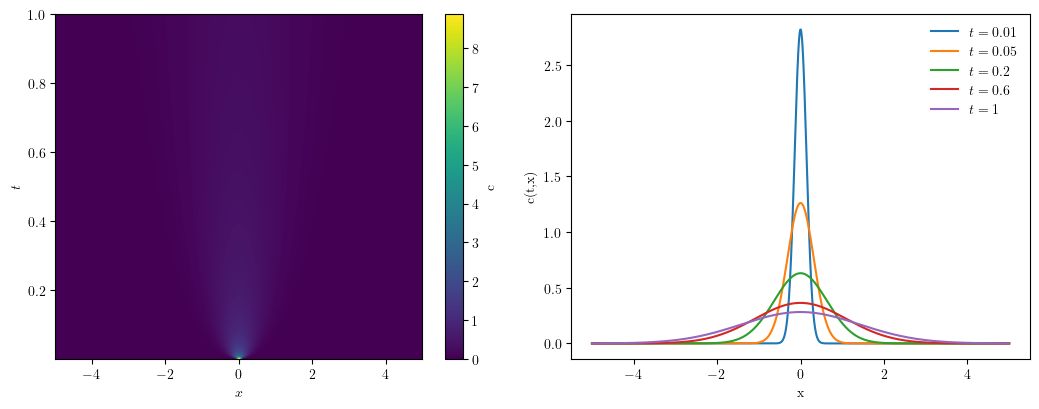

In [15]:
D = 1.0

x = np.linspace(-5, 5, 1200)
t = np.linspace(1e-3, 1.0, 250)

X, T = np.meshgrid(x, t)
C = (1.0 / np.sqrt(4.0 * np.pi * D * T)) * np.exp(-X**2 / (4.0 * D * T))

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10.5, 4.2))

im = ax0.imshow(C, origin="lower",
                extent=[x.min(), x.max(), t.min(), t.max()],
                aspect="auto")
ax0.set_xlabel("$x$")
ax0.set_ylabel("$t$")
# ax0.set_title("c(t,x) heatmap (point source)")
fig.colorbar(im, ax=ax0, label="c")


for ti in [0.01, 0.05, 0.2, 0.6, 1.0]:
    ci = (1.0 / np.sqrt(4.0 * np.pi * D * ti)) * np.exp(-x**2 / (4.0 * D * ti))
    ax1.plot(x, ci, label=f"$t={ti:g}$")
ax1.set_xlabel("x")
ax1.set_ylabel("c(t,x)")
# ax1.set_title("Time slices")
ax1.legend(frameon=False)

plt.tight_layout()
plt.savefig("../../../figs/pde/parabolic.pdf", bbox_inches="tight", transparent=True)
plt.show()

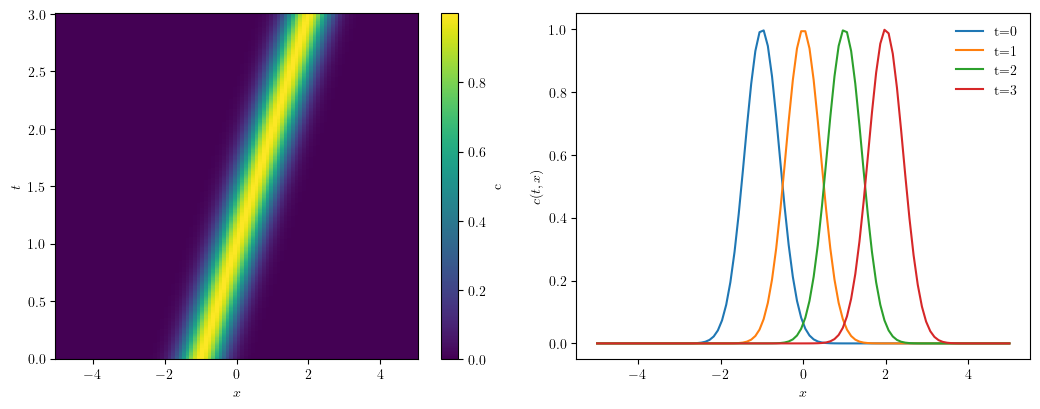

In [25]:
u = 1.0

def c0(x):
    return np.exp(-((x+1)/0.6)**2)

x = np.linspace(-5, 5, 100)
t = np.linspace(0.0, 3.0, 300)

X, T = np.meshgrid(x, t)
C = c0(X - u * T)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10.5, 4.2))

pc = ax0.pcolormesh(X, T, C, shading="nearest")
ax0.set_xlabel("$x$")
ax0.set_ylabel("$t$")
# ax0.set_title("Advection (exact): spacetime")
fig.colorbar(pc, ax=ax0, label="c")

for ti in [0, 1, 2, 3]:
    ax1.plot(x, c0(x - u * ti), label=f"t={ti:g}")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$c(t,x)$")
# ax1.set_title("Time slices (shape preserved)")
ax1.set_ylim(-0.05, 1.05)
ax1.legend(frameon=False)

plt.tight_layout()
plt.savefig("../../../figs/pde/hyperbolic.pdf", bbox_inches="tight", transparent=True)
plt.show()

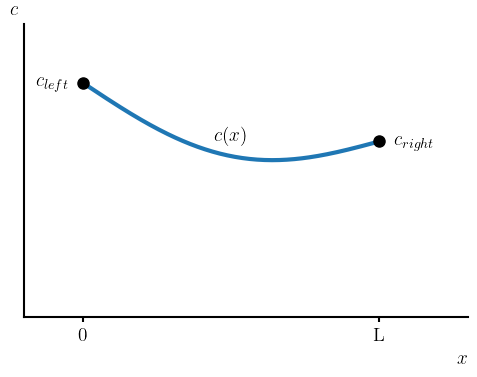

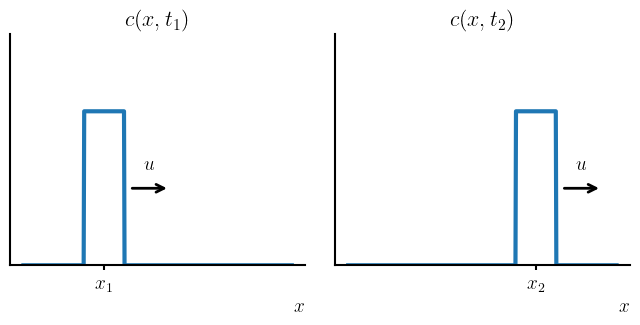

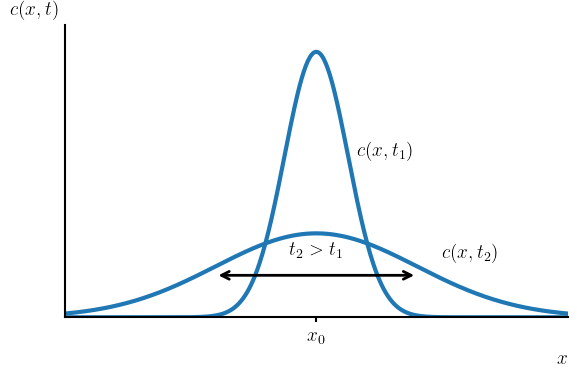

In [ ]:
plt.rcParams.update({
    'font.size': 14,
    'axes.linewidth': 1.5,
    'lines.linewidth': 3,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'mathtext.fontset': 'cm',
})

def make_schematic(ax, xlabel='$x$', ylabel='$c$'):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(xlabel, loc='right')
    ax.set_ylabel(ylabel, loc='top', rotation=0).set_y(1.02)
    ax.set_ylim(bottom=0)

def plot_equilibrium():
    fig, ax = plt.subplots(figsize=(5, 4))
    
    L = 1.0
    x = np.linspace(0, L, 200)
    
    c_left = 0.8
    c_right = 0.6
    
    c_linear = c_left + (c_right - c_left) * (x / L)
    c_curve = c_linear - 0.15 * np.sin(np.pi * x / L)

    ax.plot(x, c_curve, color='#1f77b4')
    
    ax.plot(0, c_left, 'ko', markersize=8)
    ax.plot(L, c_right, 'ko', markersize=8)
    
    ax.text(-0.05, c_left, '$c_{left}$', ha='right', va='center')
    ax.text(L + 0.05, c_right, '$c_{right}$', ha='left', va='center')
    ax.text(L/2, np.min(c_curve) + 0.05, '$c(x)$', ha='center', va='bottom')
    
    make_schematic(ax)
    ax.set_xticks([0, L])
    ax.set_xticklabels(['0', 'L'])
    ax.set_yticks([])
    
    ax.set_xlim(left=-0.2, right=L + 0.3)
    ax.set_ylim(bottom=0, top=1.0)
    
    plt.tight_layout()
    plt.savefig("../../../figs/pde/illustrator/transport_limits_equilibrium.png", bbox_inches="tight", transparent=True, dpi=300)
    plt.show()


def plot_advection():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
    
    x = np.linspace(0, 10, 500)
    
    def square_pulse(x, center, width, height):
        return np.where(np.abs(x - center) < width / 2, height, 0.0)

    width = 1.5
    height = 0.8
    x1_center = 3.0
    x2_center = 7.0
    
    c_t1 = square_pulse(x, x1_center, width, height)
    c_t2 = square_pulse(x, x2_center, width, height)
    
    ax1.plot(x, c_t1, color='#1f77b4')
    ax1.set_title('$c(x, t_1)$', fontsize=16)
    make_schematic(ax1, ylabel='')
    ax1.set_xticks([x1_center])
    ax1.set_xticklabels(['$x_1$'])
    ax1.set_yticks([])
    
    arrow_start = x1_center + width/2 + 0.2
    ax1.annotate('', xy=(arrow_start + 1.5, height/2), xytext=(arrow_start, height/2),
                 arrowprops=dict(arrowstyle='->', lw=2, color='black'))
    ax1.text(arrow_start + 0.75, height/2 + 0.1, '$u$', ha='center')

    ax2.plot(x, c_t2, color='#1f77b4')
    ax2.set_title('$c(x, t_2)$', fontsize=16)
    make_schematic(ax2, ylabel='')
    ax2.set_xticks([x2_center])
    ax2.set_xticklabels(['$x_2$'])
    ax2.set_yticks([])
    
    arrow_start_2 = x2_center + width/2 + 0.2
    ax2.annotate('', xy=(arrow_start_2 + 1.5, height/2), xytext=(arrow_start_2, height/2),
                 arrowprops=dict(arrowstyle='->', lw=2, color='black'))
    ax2.text(arrow_start_2 + 0.75, height/2 + 0.1, '$u$', ha='center')
    
    ax1.set_ylim(0, 1.2)
    plt.subplots_adjust(wspace=0.1)
    plt.savefig("../../../figs/pde/illustrator/transport_limits_advection.png", bbox_inches="tight", transparent=True, dpi=300)
    plt.show()


def plot_diffusion():
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Domain centered at 0
    x = np.linspace(-5, 5, 500)
    x0 = 0
    
    def gaussian(x, t, x0, D=1.0):
        t_eff = t + 1e-9 
        prefactor = 1 / np.sqrt(4 * np.pi * D * t_eff)
        exponent = -((x - x0)**2) / (4 * D * t_eff)
        return prefactor * np.exp(exponent)

    t1 = 0.2
    t2 = 2.0
    D_coeff = 1.0
    
    c_t1 = gaussian(x, t1, x0, D_coeff)
    c_t2 = gaussian(x, t2, x0, D_coeff)
    
    # t1 curve (tall, narrow)
    ax.plot(x, c_t1, color='#1f77b4', zorder=2)
    # t2 curve (short, wide)
    ax.plot(x, c_t2, color='#1f77b4', zorder=1)
    
    ax.text(x0 + 0.8, gaussian(x0+0.8, t1, x0, D_coeff) + 0.1, '$c(x, t_1)$')
    ax.text(x0 + 2.5, gaussian(x0+2.5, t2, x0, D_coeff) + 0.05, '$c(x, t_2)$')

    make_schematic(ax, ylabel='$c(x, t)$')
    ax.set_xticks([x0])
    ax.set_xticklabels(['$x_0$'])
    ax.set_yticks([])
    ax.set_xlim(-5, 5)
    ax.set_ylim(0, np.max(c_t1)*1.1)

    arrow_y = np.max(c_t2) * 0.5
    arrow_x_span = 2.0
    ax.annotate('', xy=(arrow_x_span, arrow_y), xytext=(-arrow_x_span, arrow_y),
                arrowprops=dict(arrowstyle='<->', lw=2, color='black'))
    ax.text(0, arrow_y + 0.05, '$t_2 > t_1$', ha='center')
    
    plt.tight_layout()
    plt.savefig("../../../figs/pde/illustrator/transport_limits_diffusion.png", bbox_inches="tight", transparent=True, dpi=300)
    plt.show()


plot_equilibrium()
plot_advection()
plot_diffusion()